In [1]:
import numpy as np 
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('/Users/mt/Documents/TCEproject/data/data3.csv')
data

,Unnamed: 0,CD4NadirBeforeTCE,BaselineCD4Count,pastrawLoad,pastCD4count,BaselineRNAlog
0,0,5,100,1000,40,0
1,1,267,296,15849,5,1
2,2,296,369,3981,164,0
3,3,19,19,19953,156,1
4,4,106,207,15849,472,0
...,...,...,...,...,...,...
109147,109147,50,101,501,51,0
109148,109148,213,403,79,112,1
109149,109149,224,247,3981,244,1
109150,109150,9,81,5012,88,1


In [3]:
data_copy = data.drop(['Unnamed: 0'], axis =1)
data_copy

,CD4NadirBeforeTCE,BaselineCD4Count,pastrawLoad,pastCD4count,BaselineRNAlog
0,5,100,1000,40,0
1,267,296,15849,5,1
2,296,369,3981,164,0
3,19,19,19953,156,1
4,106,207,15849,472,0
...,...,...,...,...,...
109147,50,101,501,51,0
109148,213,403,79,112,1
109149,224,247,3981,244,1
109150,9,81,5012,88,1


In [4]:
data.values

array([[     0,      5,    100,   1000,     40,      0],
       [     1,    267,    296,  15849,      5,      1],
       [     2,    296,    369,   3981,    164,      0],
       ...,
       [109149,    224,    247,   3981,    244,      1],
       [109150,      9,     81,   5012,     88,      1],
       [109151,    151,    207,   1995,    416,      0]])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = data_copy['BaselineRNAlog'].values
X = data_copy.drop(['BaselineRNAlog'], axis =1).values

In [7]:
from sklearn.preprocessing import LabelEncoder


In [8]:
encoder = LabelEncoder()
encoder.fit(y)
y= encoder.transform(y)

In [9]:
y

array([0, 1, 0, ..., 1, 1, 0])

In [10]:
X

array([[    5,   100,  1000,    40],
       [  267,   296, 15849,     5],
       [  296,   369,  3981,   164],
       ...,
       [  224,   247,  3981,   244],
       [    9,    81,  5012,    88],
       [  151,   207,  1995,   416]])

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [13]:
X = (scaler.transform(X))
X

array([[-1.0433021 , -0.96295819, -0.26904034, -1.34010951],
       [ 0.97377943,  0.01935292, -0.12737008, -1.4959953 ],
       [ 1.19704418,  0.38521369, -0.24059943, -0.78782844],
       ...,
       [ 0.6427317 , -0.22622486, -0.24059943, -0.43151807],
       [-1.01250696, -1.05818223, -0.23076294, -1.12632329],
       [ 0.08072043, -0.42669651, -0.25954732,  0.33454923]])

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)
X_test, X_val, y_test, y_val  = train_test_split(X_test,y_test, test_size = 0.5, random_state = 42)

In [15]:
X_test

array([[ 0.28858762, -0.44674368, -0.27782735,  4.68153576],
       [-0.54288111,  0.42530802, -0.18317379,  0.4726195 ],
       [ 0.47335844,  1.10691165,  2.7384642 ,  0.17420957],
       ...,
       [-0.93551912, -0.93789923, -0.24059943,  1.06498549],
       [ 0.69662319, -0.30641352, -0.23076294, -1.33565563],
       [-1.05869967,  0.89140462, -0.26345902, -0.93926034]])

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = keras.Sequential()
model.add(layers.Dense(12, input_dim  = 4, activation="relu"))
model.add(layers.Dense(10, activation ='relu'))
model.add(layers.Dense(8,  activation = 'relu'))
model.add(layers.Dense(6,  activation = 'relu'))
model.add(layers.Dense(4,  activation = 'relu'))
model.add(layers.Dense(2,  activation = 'relu'))
model.add(layers.Dense(1,  activation ='sigmoid'))

In [19]:
len(model.layers)

7

In [18]:
# model.compile(loss='binary_crossentropy', optimizer='sgd',metrics =[tf.keras.metrics.BinaryAccuracy()])
model.compile(loss='binary_crossentropy', optimizer='adam',metrics =[tf.keras.metrics.BinaryAccuracy()])

In [45]:
model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=130, batch_size=64)

Epoch 1/130
1194/1194 [==============================] - 2s 2ms/step - loss: 0.4269 - binary_accuracy: 0.8043 - val_loss: 0.4252 - val_binary_accuracy: 0.8049
Epoch 2/130
1194/1194 [==============================] - 2s 2ms/step - loss: 0.4324 - binary_accuracy: 0.8026 - val_loss: 0.4254 - val_binary_accuracy: 0.8063
Epoch 3/130
1194/1194 [==============================] - 2s 2ms/step - loss: 0.4188 - binary_accuracy: 0.8101 - val_loss: 0.4216 - val_binary_accuracy: 0.8063
Epoch 4/130
1194/1194 [==============================] - 2s 2ms/step - loss: 0.4263 - binary_accuracy: 0.8052 - val_loss: 0.4443 - val_binary_accuracy: 0.7943
Epoch 5/130
1194/1194 [==============================] - 2s 2ms/step - loss: 0.4290 - binary_accuracy: 0.8040 - val_loss: 0.4492 - val_binary_accuracy: 0.7997
Epoch 6/130
1194/1194 [==============================] - 2s 2ms/step - loss: 0.4335 - binary_accuracy: 0.8006 - val_loss: 0.4231 - val_binary_accuracy: 0.8032
Epoch 7/130
1194/1194 [=======================

1194/1194 [==============================] - 2s 1ms/step - loss: 0.4288 - binary_accuracy: 0.8064 - val_loss: 0.4164 - val_binary_accuracy: 0.8182
Epoch 104/130
1194/1194 [==============================] - 2s 1ms/step - loss: 0.4222 - binary_accuracy: 0.8095 - val_loss: 0.4452 - val_binary_accuracy: 0.7957
Epoch 105/130
1194/1194 [==============================] - 2s 1ms/step - loss: 0.4212 - binary_accuracy: 0.8093 - val_loss: 0.4136 - val_binary_accuracy: 0.8165
Epoch 106/130
1194/1194 [==============================] - 2s 2ms/step - loss: 0.4180 - binary_accuracy: 0.8118 - val_loss: 0.4245 - val_binary_accuracy: 0.8108
Epoch 107/130
1194/1194 [==============================] - 2s 1ms/step - loss: 0.4253 - binary_accuracy: 0.8066 - val_loss: 0.4064 - val_binary_accuracy: 0.8210
Epoch 108/130
1194/1194 [==============================] - 2s 1ms/step - loss: 0.4150 - binary_accuracy: 0.8136 - val_loss: 0.4226 - val_binary_accuracy: 0.8157
Epoch 109/130
1194/1194 [=======================

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [48]:
history.history


{'loss': [0.611649215221405,
  0.5964299440383911,
  0.5910674929618835,
  0.5852375030517578,
  0.5767319202423096,
  0.5648899674415588,
  0.550603985786438,
  0.5383069515228271,
  0.5280113220214844,
  0.5178349614143372,
  0.5118973851203918,
  0.5046512484550476,
  0.49865996837615967,
  0.49389150738716125,
  0.4891650080680847,
  0.4873579442501068,
  0.48278287053108215,
  0.48096656799316406,
  0.48127973079681396,
  0.47789672017097473,
  0.47656816244125366,
  0.4761534631252289,
  0.4725068509578705,
  0.46933701634407043,
  0.4706897437572479,
  0.46894749999046326,
  0.46778276562690735,
  0.4672357439994812,
  0.46653103828430176,
  0.46308550238609314,
  0.46375730633735657,
  0.4622645378112793,
  0.4577510952949524,
  0.46116146445274353,
  0.45746493339538574,
  0.4562970995903015,
  0.4588468372821808,
  0.4606834650039673,
  0.45491504669189453,
  0.4560481309890747,
  0.45107510685920715,
  0.4512249529361725,
  0.45197567343711853,
  0.4497368633747101,
  0.4486

In [50]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
print(history.history.keys())


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


In [52]:
score = model.evaluate(X_test, y_test, verbose =0)
print("Test Score: ", score[0])
print("Test Accuracy: ", score[1])

Test Score:  0.4029824137687683
Test Accuracy:  0.8255053758621216


In [53]:
score = model.evaluate(X_train, y_train, verbose =0)
print("Training Score: ", score[0])
print("Validation Accuracy: ", score[1])


Training Score:  0.40573352575302124
Validation Accuracy:  0.8215323686599731


Text(0.5, 0, 'Epoch')

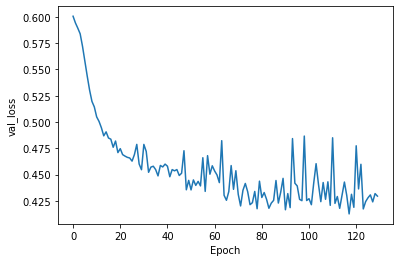

In [54]:
plt.plot(range(130), history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

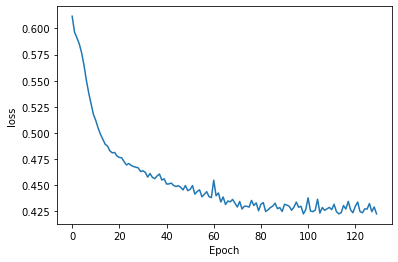

In [55]:
plt.plot(range(130), history.history['loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')

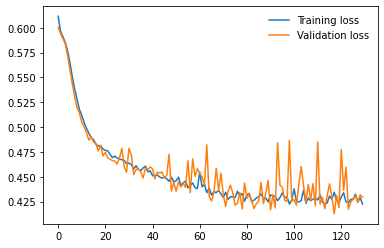

In [56]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(frameon=False)




In [57]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [63]:
predictions = model.predict_classes(X_test)
predictions
# accuracy_score(y_test, predictions)
# accuracy_score



array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int32)

In [59]:
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,predictions)
precision = precision.result().numpy()
precision

0.8690252

In [60]:
Recall = tf.keras.metrics.Recall()
Recall.update_state(y_test,predictions)
Recall.result().numpy()


0.8503501

In [61]:
SensitivityAtSpecificity = tf.keras.metrics.SensitivityAtSpecificity(0.5)
SensitivityAtSpecificity.update_state(y_test, predictions)
SensitivityAtSpecificity.result().numpy()

0.8503501

In [62]:
SpecificityAtSensitivity = tf.keras.metrics.SpecificityAtSensitivity(0.5)
SpecificityAtSensitivity.update_state(y_test, predictions)
SpecificityAtSensitivity.result().numpy()


0.7835441

In [64]:
from keras.models import model_from_yaml


In [65]:
model.save("model.h5")


In [ ]:
import pickle
import tempfile
from tensorflow.keras.models import Sequential, load_model, save_model, Model

In [ ]:
# Hotfix function
def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = {'model_str': model_str}
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = load_model(fd.name)
        self.__dict__ = model.__dict__


    cls = Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__

In [ ]:
make_keras_picklable()

In [35]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

NameError: name 'pickle' is not defined

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
predictions = model.predict_classes(X_test)
predictions
accuracy_score(y_test, predictions)


In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score, recall_score

In [ ]:
precision_score(y_test, predictions)

In [ ]:
recall_score(y_test, predictions)

In [ ]:
b = data['BaselineRNAlog']
a = []
a.append(b)
a

In [ ]:
ones = []
zeros = []
for i in b:
    if i == 1:
        ones.append(i)
    else:
        zeros.append(i)
print("ones...", len(ones))
print("zeros... ",  len(zeros))

In [ ]:
round(len(ones)/len(b),2)

In [ ]:
round(len(zeros)/len(b),2)